In [30]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib import pylab
from pylab import *

plt.rcParams["figure.figsize"] = (10,4)

# Lab 2: Calculating Backgrounds

# Part 1: Gamma Rays with Cosmic Ray Background

Imagine we are looking for Gamma ray sources where our detector is a telescope. Our telescope is also sensitive to cosmic rays--consisting of protons and electrons--which produce a Poisson background distrbution.

We shall assume that our background Poisson distribution of cosmic rays is 3 rays/day, and the average number of Gamma rays emitted by our source is 7 rays/day. Below we shall explore how our background distribution evolves as we collect more days of data; we shall then answer the question *If we see 21 rays in 3 days, what is the probability that my background distribution for 3 days could have produced this many rays or more?*

## 1.1 How probability distribution changes with number of days

Recall that our cosmic ray background is a Poisson distribution with an average rate of $\lambda = 3$ rays/day. (See Lab 1 for a detailed explanation of Poisson distributions). That is:

$$P(k\space cosmic \space rays \space per \space day) = \frac{\lambda^k e^{-\lambda}}{k!} = \frac{3^k e^{-3}}{k!}$$

Suppose we take measurements over multiple days. What are the background distributions we expect to see?  We expect to see a **sum of the measurements we could see each day**; that is, we need to convolve the background with itself n-1 times if take data over n days:

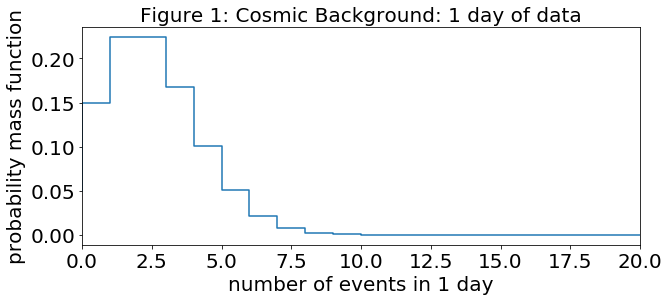

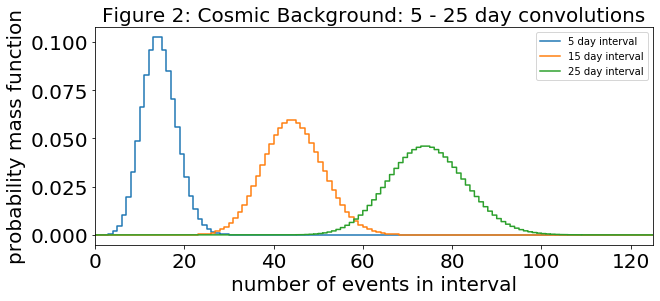

In [94]:
#set up cosmic ray background parameters

avgCosmic = 3 #assume background is Poisson with 3 rays/day
x = np.arange(0,30,1) #we make the tail long enough to avoid errors in convolutions
background1day = stats.poisson.pmf(x, avgCosmic)

figure(1)
plt.step(x,background1day)
plt.title ('Figure 1: Cosmic Background: 1 day of data',size = 20)
plt.xlabel('number of events in 1 day', size = 20)
plt.ylabel('probability mass function', size = 20)
plt.tick_params(labelsize = 20)
plt.xlim([0,20])

numDays = 5 #will plot 5, 15, 25 days of background
maxDays = 25
fig, ax = plt.subplots(1,1)
plt.title('Figure 2: Cosmic Background: '+ str(numDays)+' - '+str(maxDays) +' day convolutions',size = 20)
plt.xlabel('number of events in interval', size = 20)
plt.ylabel('probability mass function',size = 20)
plt.tick_params(labelsize = 20)

while numDays <= maxDays:
    multDays = background1day
    for i in range(numDays-1): #convolve background numDays-1 times
        multDays = np.convolve(multDays, background1day)
    xplot = np.arange(0, len(multDays),1) #in order to plot we need to know how long our convolved vector is
    ax.step(xplot, multDays, label = str(numDays) + ' day interval')
    leg = ax.legend()
    numDays = numDays + 10
plt.xlim([0,125])
plt.show()


We see that as we sum our background data over more days, our distribution shifts to the right, with a peak at $(3 \times \# days$). This makes sense because as we gather data over more intervals, a **constant average rate** (which is required for a distribution to be poisson) implies that the most likely measurement in multiple days should be the most likely measurment in one day multiplied by the number of days over which we collect data.

Additionally, the spread of the distribution increases. This makes sense because as we gather data over multiple intervals, there are more ways in which we can sum to get a number near the peak. (See homework 2 for a discussion on convolutions and summing dice rolls).

## 1.2 : Convolution of Poisson is still Poisson

Another interesting feature we observe in Figure 2 is that as the background is summed over multiple days, the distributions seems to remain Poisson.

In fact, we expect a convolution of Poisson distributions to remain Poisson because a Poisson distribution arises when we **count how many times a discrete event occurs in a fixed interval, knowing that the event has a constant average rate**. Thus, if we look at the data for 5 days, what we are doing is **counting how many times cosmic rays hit a detector in 5 days**. Since the average rate of cosmic rays per day (3 rays/day) is constant, the average rate of rays per 5 days is also constant (3 rays/day = 15 rays/5 days). Hence we expect our 5 day distribution to simply be a poisson with mean $\lambda = 15$. Let's graph the two and check that they are the same:

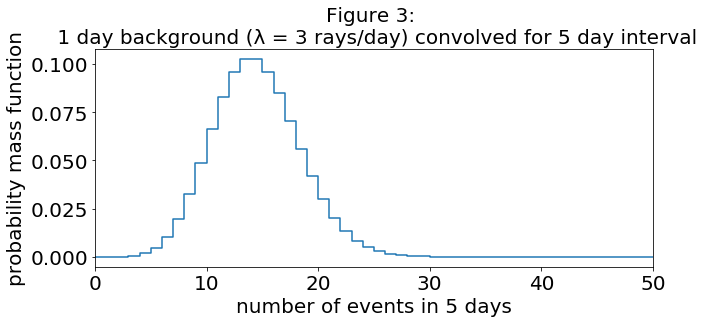

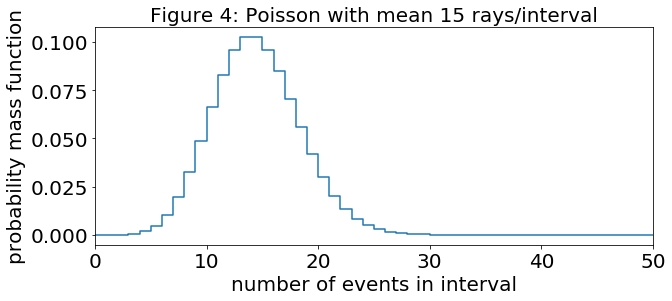

In [102]:
multDays = background1day #recall background1day = stats.poisson.pmf(x,3)
for i in range(4):
    multDays = np.convolve(background1day,multDays)
figure()
plt.title('Figure 3: \n 1 day background (\u03bb = 3 rays/day) convolved for 5 day interval', size = 20)
plt.xlabel('number of events in 5 days', size = 20)
plt.ylabel('probability mass function',size = 20)
xplot1 = np.arange(0,len(multDays),1)
plt.step(xplot1,multDays)
plt.xlim([0,50])
plt.tick_params(labelsize = 20)
plt.show()

    
figure()
plt.title('Figure 4: Poisson with mean 15 rays/interval',size = 20)
plt.xlabel('number of events in interval',size = 20)
plt.ylabel('probability mass function', size = 20)
#xplot2 = np.arange(0,100,1)
plt.step(xplot1,stats.poisson.pmf(xplot1,15))
plt.xlim([0,50])
plt.tick_params(labelsize = 20)
plt.show()


MIGHT DO THIS LATER: SHOW THAT THE CONVOLUTION IS STILL POISSON BY SIMPLIFYING THE SUMMATION

## 1.3 Average Background over Multiple Days

In the previous section we looked at how the background distribution changes as we summed the background over multiple days. We want to take a look at how the *average* background distribution changes as we take multiple days of data. To do this, we simply have to **sum up the background of n days, and then divide by the number of days we took measurments**. That is, averageing the background over n days is really just a rescaling of the convolved distrubtions we saw in section 1.2:

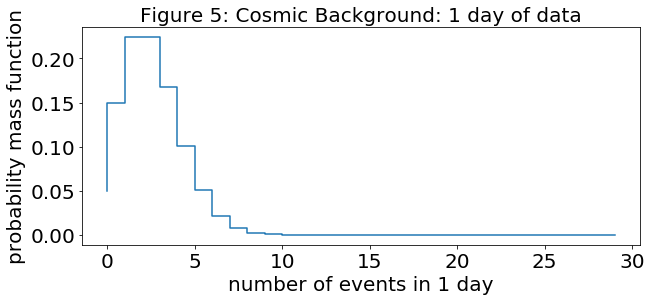

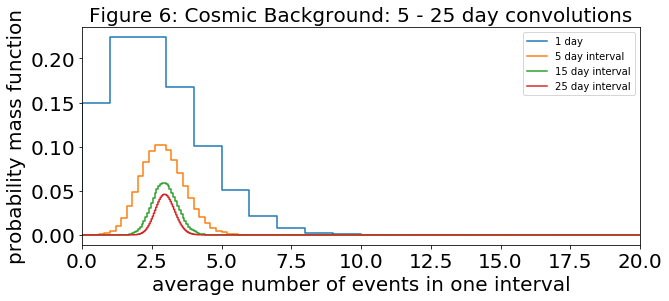

In [103]:
figure(1) #plot 1 day background
plt.step(x,background1day)
plt.title ('Figure 5: Cosmic Background: 1 day of data',size = 20)
plt.xlabel('number of events in 1 day', size = 20)
plt.ylabel('probability mass function', size = 20)
plt.tick_params(labelsize = 20)

numDays = 5 #will plot 5, 15, 25 days of background
maxDays = 25
fig, ax = plt.subplots(1,1)
plt.title('Figure 6: Cosmic Background: '+ str(numDays)+' - '+str(maxDays) +' day convolutions',size = 20)
plt.xlabel('average number of events in one interval', size = 20)
plt.ylabel('probability mass function',size = 20)
plt.tick_params(labelsize = 20)
ax.step(x, background1day, label = '1 day')
while numDays <= maxDays:
    multDays = background1day
    for i in range(numDays-1): #convolve background numDays-1 times
        multDays = np.convolve(multDays, background1day)
    xplot = np.arange(0, len(multDays)/numDays,1/numDays) #AVERAGE MEANS RESCALING
    ax.step(xplot, multDays, label = str(numDays) + ' day interval')
    numDays = numDays + 10

leg = ax.legend()
plt.xlim([0,20])
plt.show()


We see that that the *average* background distribution shifts less to the right as we average over many days than if we simply summed over multiple days; In fact, the peak moves closer and closer to the average rate 3 rays/day. Additionally, the distriubtion becomes more symmetric and appears to be apporaching a smooth bell-shaped curve. This is inline with the Central Limit Theorem: as we sum the background over more and more days, the more our distribution will look like the Gaussian distribution. Note from our discussion in section 1.2 that this also implies that the Poisson will approach a Gaussian distribution as we let the average rate $\lambda \rightarrow \infty$ -- that is, as we let our interval over which we calculate the the consant rate go to infinity.

## 1.4 Example Evaluation of Possible Gamma Ray Detection

Suppose we collect data for three days and our telescope ends up seeing 21 rays. We shall evaluate whether or not this is likely to be a signal from our Gamma source or something produced by the background.

Recall that our background for one day is a Poisson distribution with an average rate $\lambda = 3$ rays/day, and we know that our Gamma source produces, on average, 7 rays/day. 

### 1.4.1 Calculating Significance by *Summing* Over Three Days

In this section we will do all of our calculations without averaging our data.

Below we calculate and display the background distribution which is summed over three days:

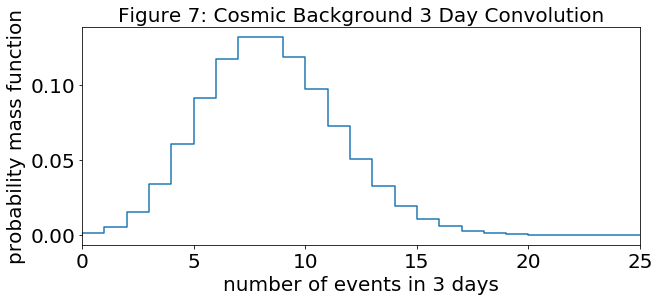

In [108]:
threeDays = background1day # recal background1day = stats.poisson.pmf(x,3)

for i in range(2):
    threeDays = np.convolve(threeDays,background1day)

figure()
plt.title('Figure 7: Cosmic Background 3 Day Convolution', size = 20)
plt.xlabel('number of events in 3 days', size = 20)
plt.ylabel('probability mass function', size = 20)
plt.tick_params(labelsize = 20)
xplot = np.arange(0,len(threeDays),1)
plt.xlim([0,25])
plt.step(xplot,threeDays)
plt.show()

Now, our telescope has measured 21 events in these three days. We want to know how likely it is that this signal was produced by our background, and what the significance of our measurement is. That is, we want to know:
<br>
<br>
<center><i>What is the probability that my background distribution for three days produced a signal that is greater than or equal to 21 events in three days? Furthermore, if my background were normally distributed, how far away from the mean, in units of standard deviation, would my signal have to be in order to produce this same probability?</i></center>
<br>

We carry out the calculation below. (see **Lab 1** for a discussion on the cdf and ppf functions).

In [123]:
#calculate probablity that cosmic background produced 21 events in 3 days:

#below we use the fact that collecting 3 days of data is a Poisson distribution
#with 3 times the mean of 1 day of data; avgCosmic is the average rate for 1 day of cosmic rays
cosmicProb = 1 - stats.poisson.cdf(21,3*avgCosmic)

#below we calculate the significance
significance = stats.norm.ppf(1-cosmicProb)

print('Probability Cosmic rays produced 21 events or more in 3 days = ', cosmicProb)
print('Significance = ', significance, '\u03C3')



Probability Cosmic rays produced 21 events or more in 3 days =  0.00017495107488796346
Significance =  3.5752434478403172 σ


Hence we see that the probability that our background produced a signal of 21 events or more in 3 days is very low: 0.0175%. If our background were normally distributed, we would have to be at least 3.57 standard deviations to the right of the mean in order to produce such a low probability. Unfortunately, the physics community generally requires a significance of 5$\sigma$ in order to claim a discovery, so we cannot claim such a victory in this case.

### 1.4.2 Calculating Significance by *Averaging* Over Three Days

Let's repeat what we did in section 1.4.1, but this time we will *average* our background **and our signal** over the three days:

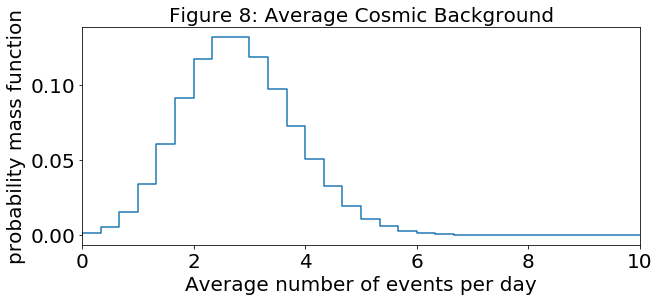

In [126]:
threeDays = background1day # recal background1day = stats.poisson.pmf(x,3)

for i in range(2):
    threeDays = np.convolve(threeDays,background1day)

figure()
plt.title('Figure 8: Average Cosmic Background', size = 20)
plt.xlabel('Average number of events per day', size = 20)
plt.ylabel('probability mass function', size = 20)
plt.tick_params(labelsize = 20)
xplot = np.arange(0,len(threeDays)/3,1/3)#AVERAGING IS RESCALING X AXIS!
plt.xlim([0,10])
plt.step(xplot,threeDays)
plt.show()

Now, instead of our signal being 21 events in three days, we are wondering about the likelihood of an **average signal of 7 rays/day**:
<br>
<br>
<center><i>What is the probability that my <b>average background distribution</b> (averaged over three days) produced a signal that is greater than or equal to <b>7 events per day</b>? Furthermore, if my background were normally distributed, how far away from the mean, in units of standard deviation, would my signal have to be in order to produce this same probability?</i></center>

In order to integrate our averaged background to find the probability , we will simply sum all the probabilities i

In [127]:
#calculate probablity that the AVERAGE cosmic background (over three days) produced an AVERAGE signal of 7 rays/day

cosmicProb2 = scipy.integrate.quad(threeDays, 7, 200)
#below we calculate the significance
#significance = stats.norm.ppf(1-cosmicProb)

print('Probability Cosmic rays produced 21 events or more in 3 days = ', cosmicProb)
#print('Significance = ', significance, '\u03C3')

ValueError: invalid callable given

IM GONNA RETURN TO THIS SECTION (MIGHT TAKE IT OUT BECAUSE I DON'T THINK IM DOING IT RIGHT ALSO NOT NECESSARY)

# Part 2: Exponential Distribution and the Central Limit Theorem

In this section we will explore how the Exponential Distribution changes shape as we sum and average the distribution over many intervals.

WILL ADD TEXT LATER FOCUSING ON CODE RIGHT NOW

Exponential: if X is a random variable that is Poisson distributed with rate $\lambda$, then the *waiting time between events X is exponentially distributed* with rate parameter $\lambda$ : P(t) = $\lambda e^{-\lambda t}$


[0.25 0.75 1.25]


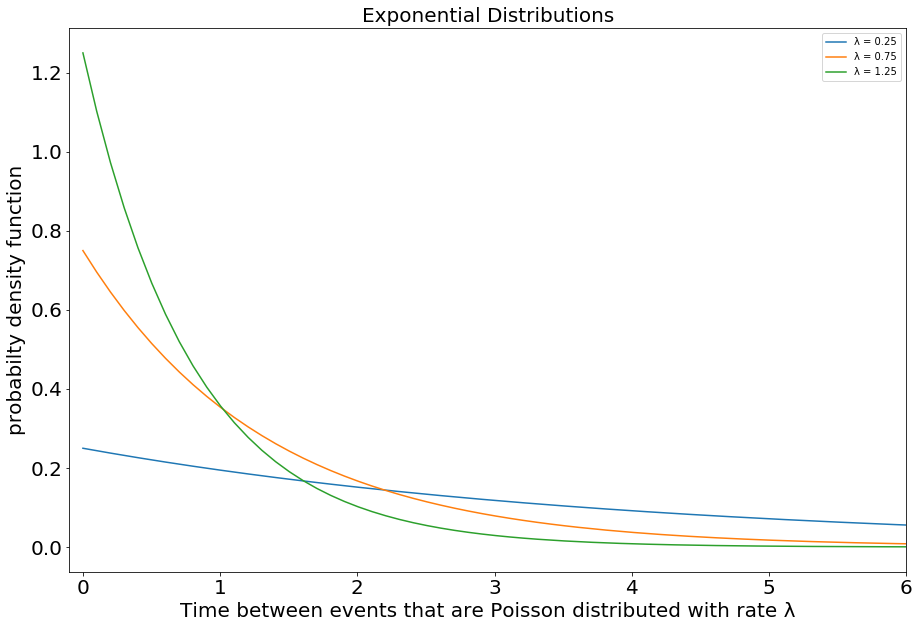

In [199]:
rateParam = 1


fig, ax = plt.subplots(1,1,figsize = (15,10))
plt.title('Exponential Distributions', size = 20)
plt.xlabel('Time between events that are Poisson distributed with rate \u03BB', size = 20)
plt.ylabel('probabilty density function',size = 20)
plt.tick_params(labelsize = 20)


x = np.linspace(0,30,300)

ratearray = np.arange(0.25,1.5,0.5)
print(ratearray)

for i in ratearray:
    ax.plot(x,stats.expon.pdf(x,0,1/i),label = '\u03BB = ' + str(i))

leg = ax.legend()
plt.xlim([-0.1,6])
plt.show()
        

100
199


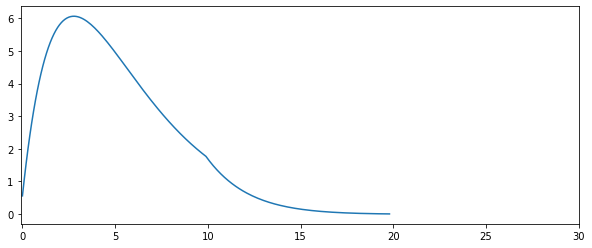

In [201]:
x1 = np.linspace(stats.expon.ppf(0.01),stats.expon.ppf(0.99),100)
back = stats.expon.pdf(x1,0,1/0.75)
multInterval = stats.expon.pdf(x1,0,1/0.75)
print(len(x1))

# numconv = 5
# for i in range(0,numconv-1):
#     multInterval = np.convolve(multInterval, back)
# xplot = np.arange(0,len(multInterval),1)
# plt.plot(xplot,multInterval)   
# multInterval = stats.expon.pdf(x1,3)    
    
    
numconv = 2
for i in range(0,numconv-1):
    multInterval = np.convolve(multInterval, back)
xplot = np.arange(0,len(multInterval)*0.1,0.1)
plt.plot(xplot,multInterval)
plt.xlim([-0.1,30])


# sum3 = 0
# for i in multInterval:
#     sum3 = sum3 + i
# print(sum3)


# multInterval = stats.expon.pdf(x1,0,1/3)
# numconv = 3
# for i in range(0,numconv-1):
#     multInterval = np.convolve(multInterval, back)
# xplot = np.arange(0,len(multInterval)*0.1,0.1)
# plt.plot(xplot,multInterval)






print(len(multInterval))